In [2]:
!pip install patool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 kB 7.6 MB/s eta 0:00:00


In [3]:
import patoolib

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/dllab

/content/drive/MyDrive/dllab


In [9]:
%ls

Maincar.v6i.yolov5pytorch.zip


In [10]:
patoolib.extract_archive("Maincar.v6i.yolov5pytorch.zip")

INFO patool: Extracting Maincar.v6i.yolov5pytorch.zip ...
INFO:patool:Extracting Maincar.v6i.yolov5pytorch.zip ...
INFO patool: running /usr/bin/7z x -aou -o./Unpack_it9oa697 -- Maincar.v6i.yolov5pytorch.zip
INFO:patool:running /usr/bin/7z x -aou -o./Unpack_it9oa697 -- Maincar.v6i.yolov5pytorch.zip
INFO patool: ... Maincar.v6i.yolov5pytorch.zip extracted to `Maincar.v6i.yolov5pytorch' (multiple files in root).
INFO:patool:... Maincar.v6i.yolov5pytorch.zip extracted to `Maincar.v6i.yolov5pytorch' (multiple files in root).


'Maincar.v6i.yolov5pytorch'

In [11]:
dataset_path = '/content/drive/MyDrive/dllab/Maincar.v6i.yolov5pytorch'

# Overwrite and correct data.yaml with absolute paths
data_yaml = f"""
train: {dataset_path}/train/images
val: {dataset_path}/valid/images
test: {dataset_path}/test/images

nc: 21
names: ['0', '1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9', 'Bumper', 'Fender', 'Front-Windshield', 'Rear-Windshield', 'Side-Mirror', 'Side-Screen', 'door', 'headlamp', 'hood']
"""
with open('/content/data.yaml', 'w') as f:
    f.write(data_yaml)

In [14]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install dependencies
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17372, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 17372 (delta 42), reused 20 (delta 20), pack-reused 17313 (from 3)
Receiving objects: 100% (17372/17372), 16.25 MiB | 15.45 MiB/s, done.
Resolving deltas: 100% (11910/11910), done.
/content/drive/MyDrive/dllab/yolov5/yolov5


In [13]:
import os
os.environ['WANDB_MODE'] = 'disabled'

In [15]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/data.yaml --weights yolov5s.pt --name vehicledamage

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      32/49      4.53G    0.02719    0.02277     0.0128         72        640:  66% 93/141 [00:50<00:25,  1.88it/s]/content/drive/MyDrive/dllab/yolov5/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      32/49      4.53G    0.02721    0.02279    0.01286         73        640:  67% 94/141 [00:50<00:21,  2.20it/s]/content/drive/MyDrive/dllab/yolov5/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      32/49      4.53G    0.02719    0.02281    0.01283         81        640:  67% 95/141 [00:51<00:22,  2.06it/s]/content/drive/MyDrive/dllab/yolov5/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use 

In [29]:
# ✅ This avoids nested yolov5/yolov5 confusion
%cd /content/drive/MyDrive/dllab/yolov5


/content/drive/MyDrive/dllab/yolov5


YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 


/content/drive/MyDrive/dllab/yolov5


Model summary: 157 layers, 7066762 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
/content/drive/MyDrive/dllab/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 320x320 1 Bumper, 1 hood
Speed: 3.3ms pre-process, 42.7ms inference, 147.6ms NMS per image at shape (1, 3, 640, 640)


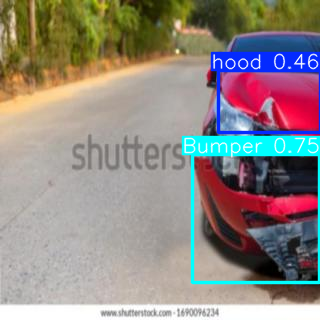

Saved 1 image to inference_output


In [35]:
# Step 1: Set directory to YOLOv5 (fixed path)
%cd /content/drive/MyDrive/dllab/yolov5

# Step 2: Import libraries
import torch
import cv2
from matplotlib import pyplot as plt
from pathlib import Path

# Step 3: Load trained YOLOv5 model
model = torch.hub.load('.', 'custom', path='runs/train/vehicledamage/weights/best.pt', source='local')

# Step 4: Load image for inference
image_path = '/content/drive/MyDrive/dllab/Maincar.v6i.yolov5pytorch/test/images/front-light-red-color-car-600w-1690096234_jpeg_jpg.rf.6a8075a29c1e0cf267bfe0757ada466e.jpg'  # 👈 change this to your image path
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 5: Run inference
results = model(img_rgb)

# Step 6: Display results
results.print()
results.show()  # Opens in a new window (if using Jupyter)
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Predicted Output")
plt.show()

# Optional: Save the result
results.save(save_dir='inference_output')


In [37]:
cost_map = {
    'Bumper': (5000, 8000),
    'Fender': (3000, 6000),
    'Front-Windshield': (7000, 12000),
    'Rear-Windshield': (7000, 12000),
    'Side-Mirror': (1000, 2500),
    'Side-Screen': (1500, 3000),
    'door': (4000, 9000),
    'headlamp': (2000, 5000),
    'hood': (6000, 10000)
}


In [38]:
def estimate_cost(detections, class_names):
    total_min = 0
    total_max = 0
    for *box, conf, cls in detections:
        label = class_names[int(cls)]
        if label in cost_map:
            min_cost, max_cost = cost_map[label]
            total_min += min_cost
            total_max += max_cost
    return total_min, total_max

# Get results and class names
detections = results.xyxy[0]  # list of detections
class_names = model.names

estimated_cost = estimate_cost(detections, class_names)
print(f"Estimated Repair Cost: ₹{estimated_cost[0]} - ₹{estimated_cost[1]}")


Estimated Repair Cost: ₹11000 - ₹18000
